<a href="https://colab.research.google.com/github/washma-sajjad/Tumor-Size-Detection-by-ML/blob/main/AI_ESP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd

df = pd.read_csv('gene_expression_dataset.csv')
print(df.head())


       BRCA1      BRCA2      TP53       HER2     PIK3CA  Tumor_Size_cm
0  12.270221  12.910959  0.104282   7.661210   6.261165          13.49
1   3.331617   1.797981  5.064228  14.143646   4.848044          17.90
2   7.781859  10.545284  5.454444  14.576731  14.436709          22.18
3   3.776734   7.458728  4.513175   4.272607   0.553304           9.71
4   9.143465   7.540185  0.772181   4.179697  13.623988          12.19


In [35]:
# 1. Basic Tumor Size Regression in Python

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('gene_expression_dataset.csv')

# Separate features and target
X = df.drop(columns=['Tumor_Size_cm'])  # input genes
y = df['Tumor_Size_cm']                 # target tumor size

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")


R² Score: 0.90
Mean Absolute Error (MAE): 1.09
Root Mean Squared Error (RMSE): 1.24


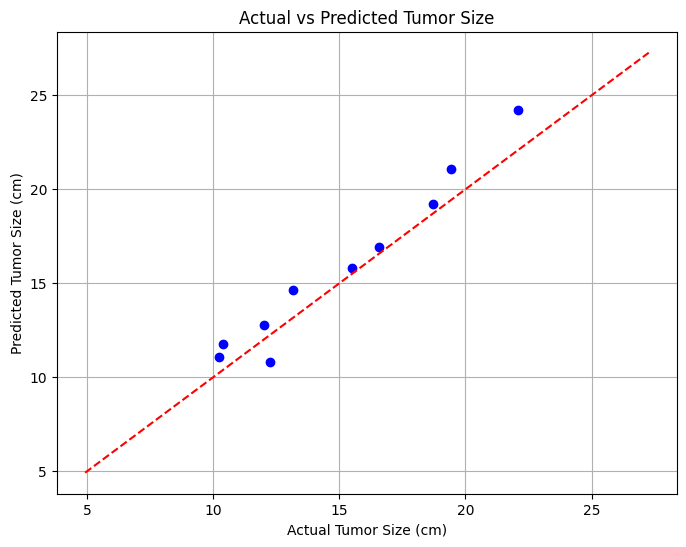

In [36]:
# Plot Actual vs Predicted Tumor Sizes

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # perfect prediction line
plt.xlabel('Actual Tumor Size (cm)')
plt.ylabel('Predicted Tumor Size (cm)')
plt.title('Actual vs Predicted Tumor Size')
plt.grid(True)
plt.show()


In [60]:
!pip install streamlit
!pip install pyngrok


In [61]:
%%writefile /content/app.py
import streamlit as st
st.title("Hello, Everyone👋")
st.write("Welcome to Tumor Size Predictor – A non-invasive gene-based estimation tool powered by Machine Learning.")
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

st.title('Tumor Size Prediction from Gene Expression')

uploaded_file = st.file_uploader("Upload your gene expression dataset (.csv)", type=["csv"])

if uploaded_file is not None:
    data = pd.read_csv(uploaded_file)
    st.write("Preview of Dataset:", data.head())

    X = data.drop(columns=['Tumor_Size_cm'])
    y = data['Tumor_Size_cm']

    model = LinearRegression()
    model.fit(X, y)

    st.subheader("Enter Gene Expression Values for Prediction")

    input_data = []
    for gene in X.columns:
        value = st.number_input(f"Enter expression value for {gene}", min_value=0.0, max_value=20.0, step=0.1)
        input_data.append(value)

    if st.button('Predict Tumor Size'):
        input_array = np.array(input_data).reshape(1, -1)
        prediction = model.predict(input_array)
        st.success(f"Predicted Tumor Size: {prediction[0]:.2f} cm")
else:
    st.info("Please upload the CSV file to continue.")


Overwriting /content/app.py


In [62]:
!ls /content/



app.py	gene_expression_dataset.csv  logs.txt  nohup.out  sample_data


In [42]:
!pip install python-dotenv
!pip install streamlit pyngrok python-dotenv pandas numpy scikit-learn


In [64]:
!pip install streamlit pyngrok > /dev/null

from getpass import getpass
from pyngrok import ngrok
import threading
import time
import os

# 1️⃣ Ask for ngrok token
token = getpass("Enter your ngrok authtoken: ")
ngrok.set_auth_token(token)

# 2️⃣ Start ngrok tunnel
public_url = ngrok.connect(8501)
print("🌍 Public URL:", public_url)

# 3️⃣ Run Streamlit in background
def run_streamlit():
    os.system("streamlit run app.py --server.port 8501 --server.headless true")

threading.Thread(target=run_streamlit).start()

# Small delay so Streamlit starts before tunnel is used
time.sleep(3)


Enter your ngrok authtoken: ··········
🌍 Public URL: NgrokTunnel: "https://fc0bebff0621.ngrok-free.app" -> "http://localhost:8501"
